In [14]:
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
# Velocity-Verlet 
def velocity_verlet(r1_0, r2_0, p1_0, p2_0, t_max, dt, f):

        t = np.arange(0, t_max, dt)

        r1 = np.zeros((len(t), r1_0.shape[0]))
        r2 = np.zeros((len(t), r2_0.shape[0]))
        p1 = np.zeros((len(t), p1_0.shape[0]))
        p2 = np.zeros((len(t), p2_0.shape[0]))

        r1[0] = r1_0
        r2[0] = r2_0
        p1[0] = p1_0
        p2[0] = p2_0

        r1_i = r1_0
        r2_i = r2_0
        p1_i = p1_0
        p2_i = p2_0

        for i in range(len(t) - 1):
            a11, a12 = f(r1_i, r2_i)

            p1_i += a11 * dt / 2.
            p2_i += a12 * dt / 2.

            r1_i += p1_i * dt
            r2_i += p2_i * dt

            a21, a22 = f(r1_i, r2_i)

            p1_i += a21 * dt / 2.
            p2_i += a22 * dt / 2.

            r1[i + 1] = r1_i
            r2[i + 1] = r2_i

            p1[i + 1] = p1_i
            p2[i + 1] = p2_i

        return r1, r2, p1, p2, t

In [16]:
def dumbbell_force(r1, r2, k=1):
    F1 = -k * (r1-r2)
    F2 = -k * (r2-r1)

    return F1, F2

In [17]:
r1_0 = np.array([1./3., 0., 0.], dtype=np.float32)
r2_0 = -r1_0
p1_0 = np.array([-6./7., 3./7., -2./7.], dtype=np.float32)
p2_0 = -p1_0

t_sim = 100
dt = 1e-2

In [18]:
r1_dumb, r2_dumb, p1_dumb, p2_dumb, t_dumb = velocity_verlet(r1_0, r2_0, 
                                                               p1_0, p2_0, 
                                                               t_sim, dt, 
                                                               dumbbell_force)

Text(0.5, 1.0, '$Time step = 0.01 \\omega_{0}^{-1}$')

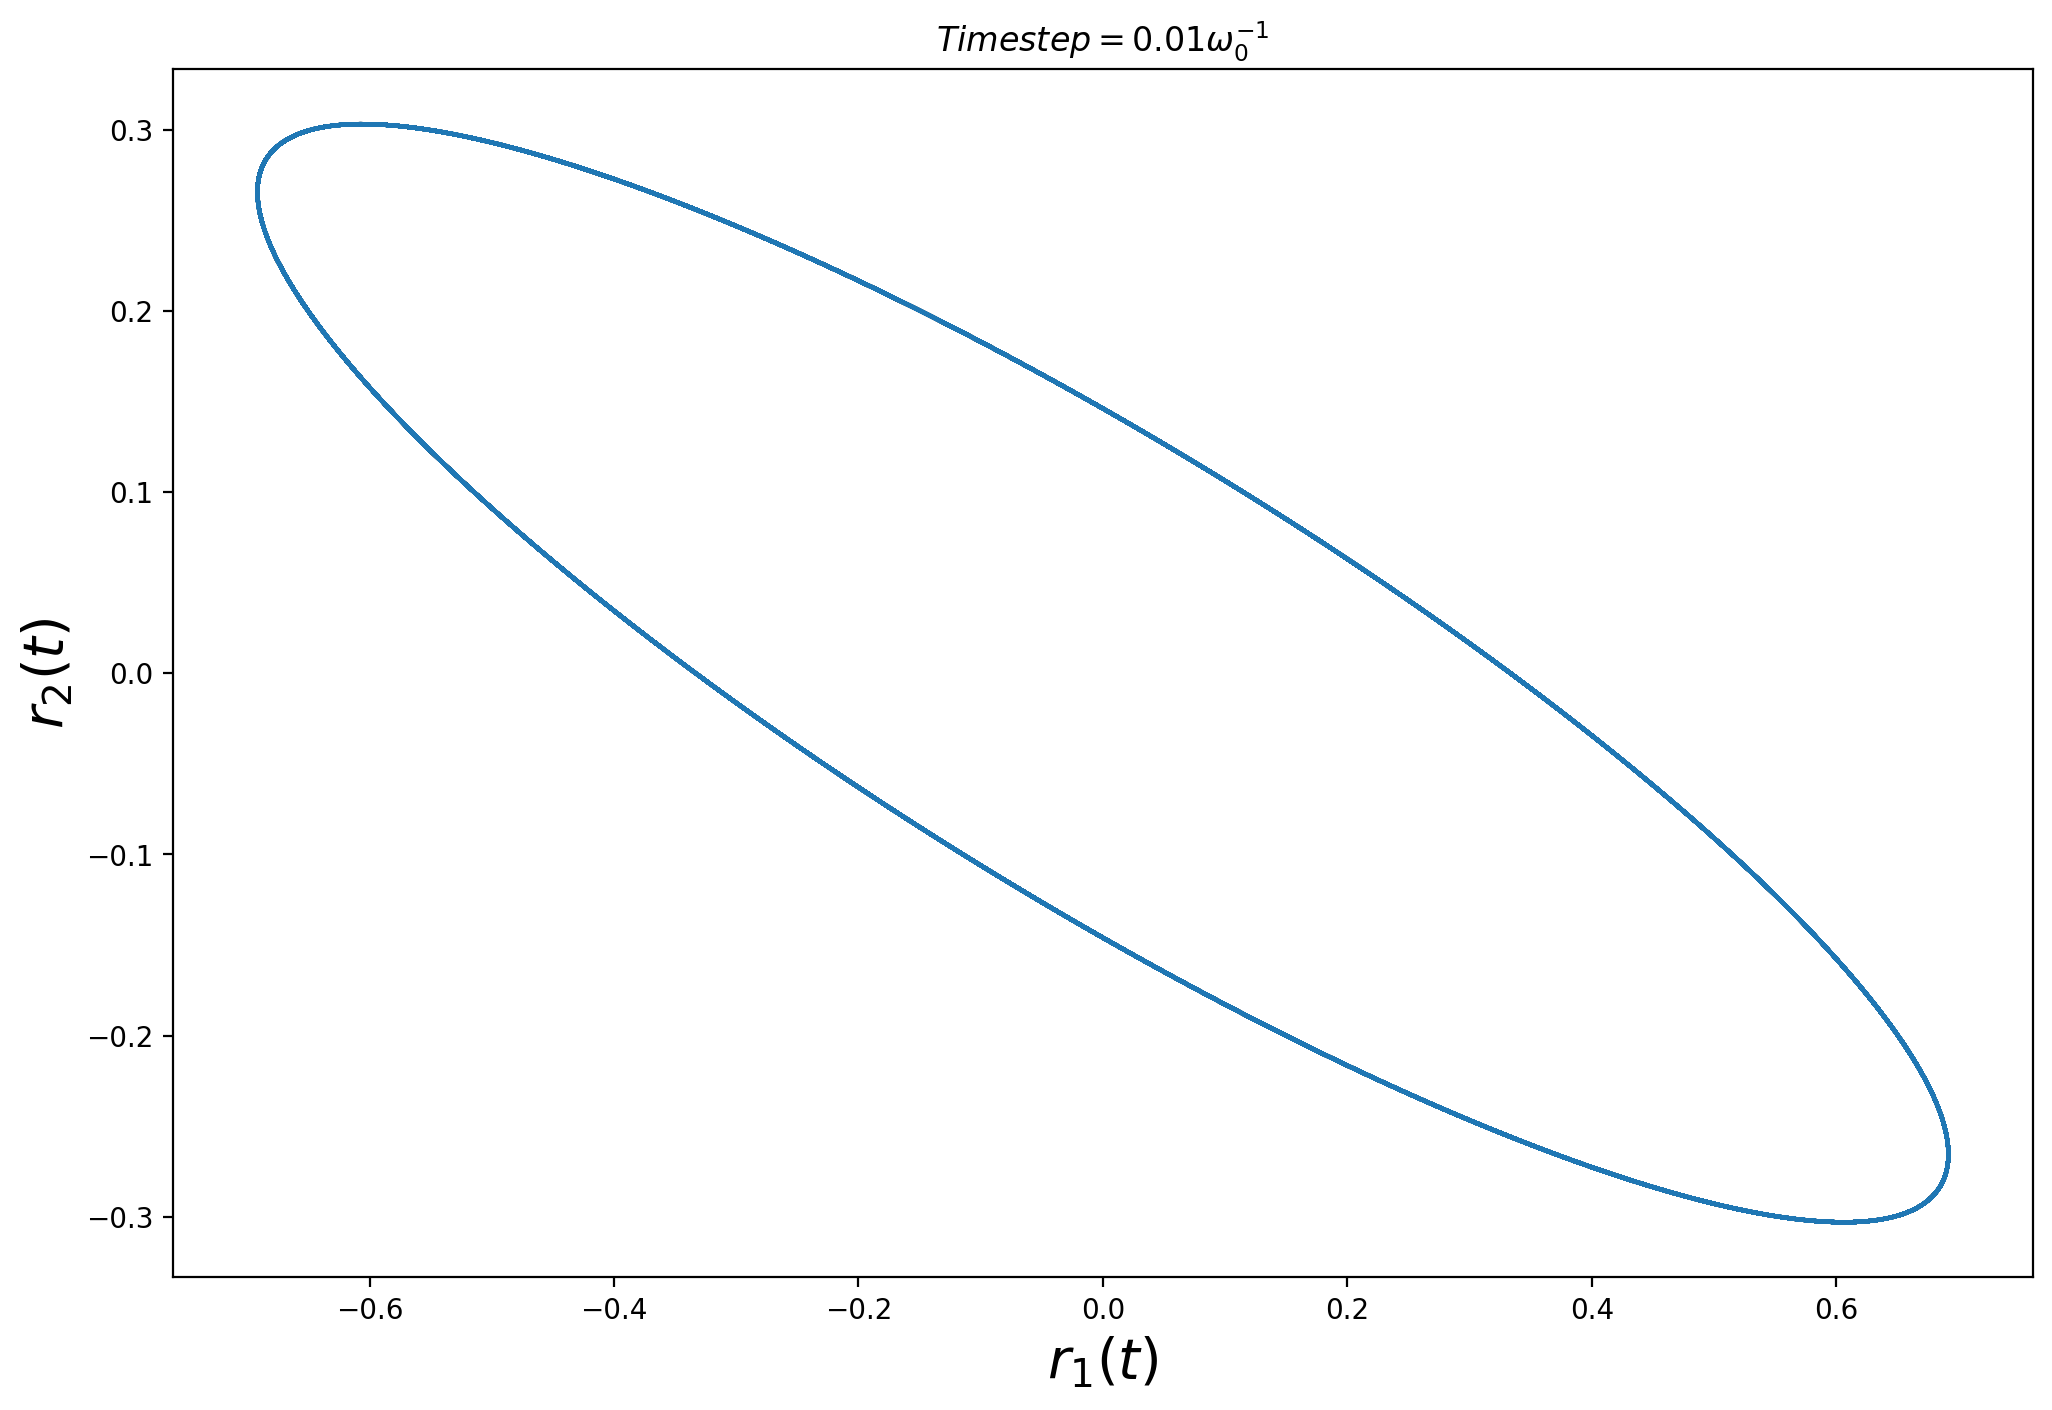

In [19]:
fig, ax = plt.subplots(figsize=(12,8), dpi=200)
plt.plot(r1_dumb[:,0], r1_dumb[:,1], 'k')
plt.plot(r2_dumb[:,0], r2_dumb[:,1])
plt.xlabel('${r_1}(t)$', fontsize=20)
plt.ylabel('${r_2}(t)$', fontsize=20)
plt.title('$Time step = 0.01 \omega_{0}^{-1}$')